In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

cust_df = pd.read_csv('Santander/train_santander.csv', encoding = 'latin-1')
print('dataset shape :', cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


클래스 값 column을 포함한 피처가 371개 존재

피처의 타입과 Null값에 대해서 탐색

In [11]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


dtype : 
실수형 111개, 정수형 260개 

In [12]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율 : {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율 : 0.04


대부분이 만족이고 불만족인 데이터의 비율이 낮기 때문에 ROC-AUC가 더 적합할 것이다

In [13]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [14]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [15]:
# var3 피처값 (최빈값으로)대체 및 ID 피처 drop
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리, 레이블 column은 DataFrame의 맨 마지막에 위치해 column -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 shape : {0}, 테스트 세트 shape : {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율 :')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율 :')
print(y_test.value_counts()/test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 shape : (15204, 369)
학습 세트 레이블 값 분포 비율 :
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율 :
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100,
            eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	va

In [19]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {'max_depth' : [5, 7], 'min_child_weight' : [1, 3], 'colsample_bytree' : [0.5, 0.75] }

gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

c:0.83344
[35]	validation_0-auc:0.90404	validation_1-auc:0.83320
[36]	validation_0-auc:0.90474	validation_1-auc:0.83313
[37]	validation_0-auc:0.90564	validation_1-auc:0.83298
[38]	validation_0-auc:0.90609	validation_1-auc:0.83291
[39]	validation_0-auc:0.90621	validation_1-auc:0.83290
[40]	validation_0-auc:0.90644	validation_1-auc:0.83222
[41]	validation_0-auc:0.90659	validation_1-auc:0.83207
[42]	validation_0-auc:0.90763	validation_1-auc:0.83139
[43]	validation_0-auc:0.90804	validation_1-auc:0.83123
[0]	validation_0-auc:0.82502	validation_1-auc:0.81427
[1]	validation_0-auc:0.83405	validation_1-auc:0.82336
[2]	validation_0-auc:0.83677	validation_1-auc:0.82516
[3]	validation_0-auc:0.84348	validation_1-auc:0.82932
[4]	validation_0-auc:0.84938	validation_1-auc:0.83173
[5]	validation_0-auc:0.85385	validation_1-auc:0.83350
[6]	validation_0-auc:0.85969	validation_1-auc:0.83434
[7]	validation_0-auc:0.86236	validation_1-auc:0.83542
[8]	validation_0-auc:0.86533	validation_1-auc:0.83514
[9]	valid

In [20]:
xgb_clf = XGBClassifier(n_estimators = 1000, random_state = 156, learning_rate = 0.02, max_depth = 7, min_child_weight = 1, colsample_bytree = 0.75, reg_alpha = 0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

uc:0.85916	validation_1-auc:0.83949
[55]	validation_0-auc:0.85938	validation_1-auc:0.83950
[56]	validation_0-auc:0.85969	validation_1-auc:0.83951
[57]	validation_0-auc:0.86014	validation_1-auc:0.83950
[58]	validation_0-auc:0.86029	validation_1-auc:0.83961
[59]	validation_0-auc:0.86032	validation_1-auc:0.83956
[60]	validation_0-auc:0.86059	validation_1-auc:0.83960
[61]	validation_0-auc:0.86102	validation_1-auc:0.83957
[62]	validation_0-auc:0.86103	validation_1-auc:0.83965
[63]	validation_0-auc:0.86131	validation_1-auc:0.83972
[64]	validation_0-auc:0.86132	validation_1-auc:0.83987
[65]	validation_0-auc:0.86155	validation_1-auc:0.83992
[66]	validation_0-auc:0.86179	validation_1-auc:0.83987
[67]	validation_0-auc:0.86202	validation_1-auc:0.83988
[68]	validation_0-auc:0.86224	validation_1-auc:0.83975
[69]	validation_0-auc:0.86241	validation_1-auc:0.83964
[70]	validation_0-auc:0.86262	validation_1-auc:0.83985
[71]	validation_0-auc:0.86272	validation_1-auc:0.83978
[72]	validation_0-auc:0.86291

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

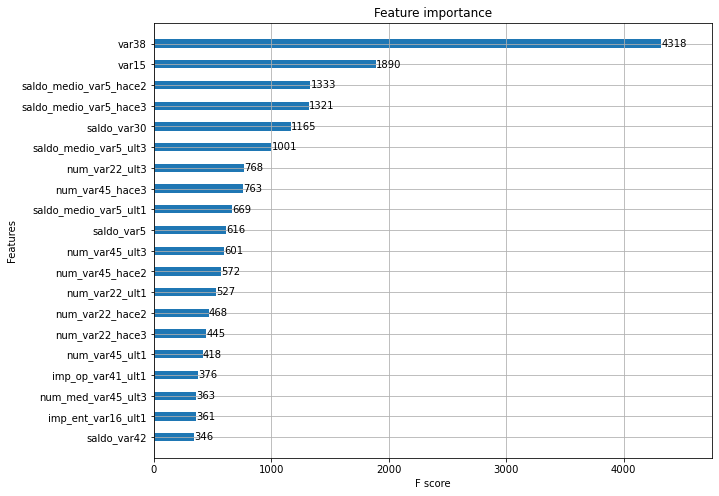

In [21]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = .4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

n_estimators : 500, early_stopping_rounds : 100, eval_metric : 'auc'

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
LGBM_clf = LGBMClassifier(n_estimators = 200)

params = {'num_leaves' : [32, 64],
          'max_depth' : [128, 160], 
          'min_child_samples' : [60, 100],
          'subsample' : [0.8, 1]}

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(lgbm_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))
